# Package Lab JuypterLab Notebook

This notebook is ued to show typical usage of the functions made for the TCLab board & PID regulation.

##### Import

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_LAB
from importlib import reload
package_LAB = reload(package_LAB)

from package_DBR import *
from package_LAB import *

## Lead Lag

In [84]:
help(Lead_Lag_RT)

Help on function Lead_Lag_RT in module package_LAB:

Lead_Lag_RT(MV, Kp, Tlead, Tlag, Ts, PV, PVInit=0, method='EBD')
    The function "Lead-lag_RT" needs to be included in a "for or while loop".
    
    :MV: input vector
    :Kp: process gain
    
    :Tlead: lead time constant [s]
    :Tlag: lag time constant [s]
    
    :Ts: sampling period [s]
    :PV: output vector
    :PVInit: (optional: default value is 0)
    :method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        TRAP: Trapezoïdal method
    
    The function "Lead-lag_RT" appends a value to the output vector "PV".
    The appended value is obtained from a recurrent equation that depends on the discretisation method.



(0.0, 100.0)

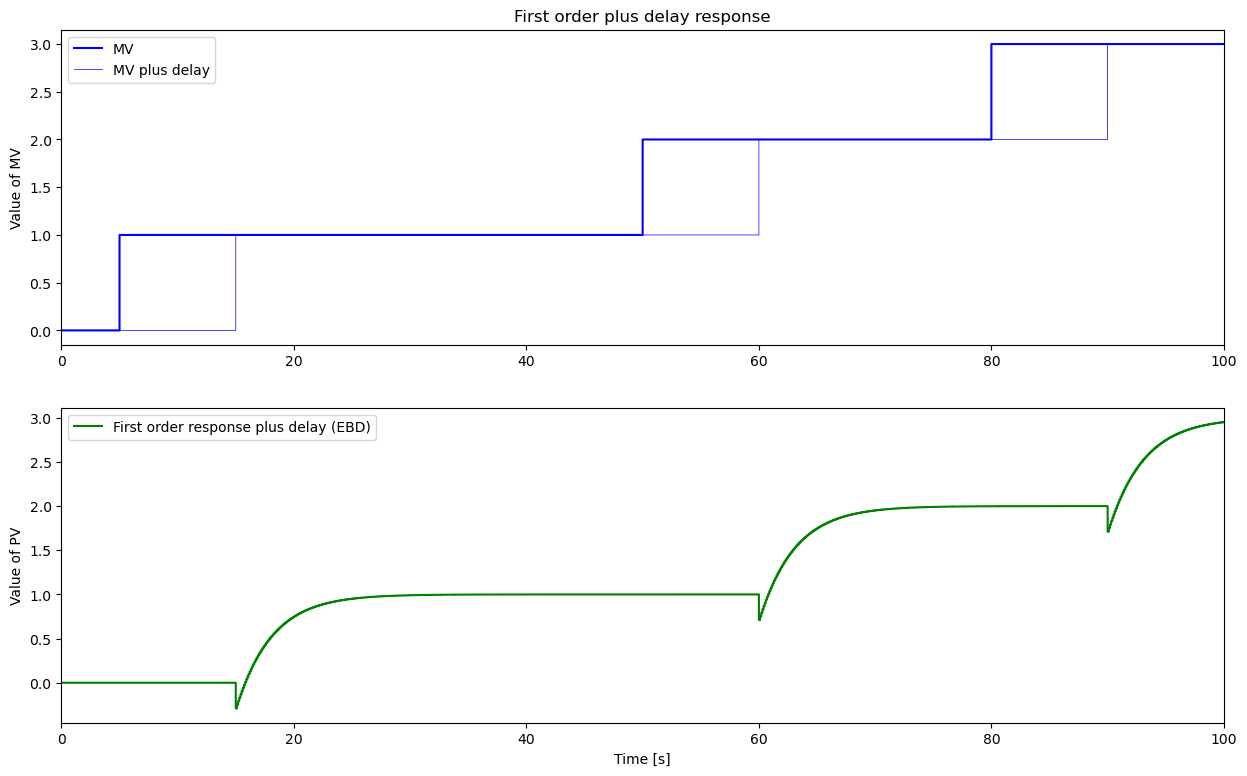

In [85]:
TSim = 100
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1,50:2, 80:3,  TSim: 3}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []

# Parameters
Kp, Tlead, Tlag, theta = 1, -1, 3, 10

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)
    
    Lead_Lag_RT(MVDelay, Kp, Tlead, Tlag, Ts, PV_EBD, PVInit=0, method='EBD')
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD,'g-',label='First order response plus delay (EBD)',where='post')
#plt.step(t,PV_EFD,'lime',label='First order response plus delay (EFD)',where='post')
#plt.step(t,PV_TRAP,'springgreen',label='First order response plus delay (TRAP)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim]) 

## PID

In [25]:
#SOPDT PV in-out dynamics params
Kp = 0.46575892823243076
T1p = 132.04151002516983
T2p = 7.647730018039972
thetap = 0.0004910330468864688

#SOPDT DV disturbance dynamics params
Kd = 0.36816132905697
T1d = 128.19758463380253
T2d = 26.094509776696448
thetad = 2.000174864808916

# PID

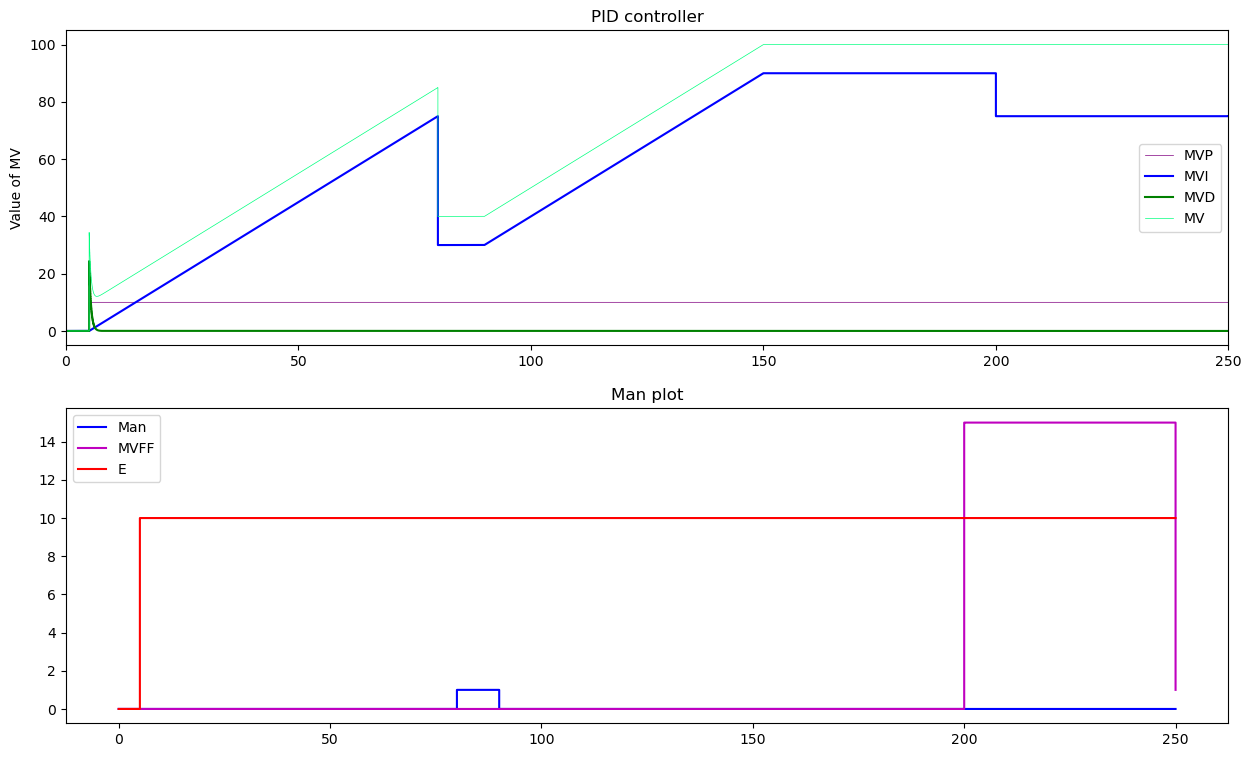

In [81]:
TSim = 250
Ts = 0.01
N = int(TSim/Ts) + 1

ActivateFF = True
ManFF= True

# Path for MV
SPPath = {0:50, 5:50, 50:50, 80:50, TSim: 50}
PVPath = {0:50, 5:40, 50:40, 80:40, TSim: 40}
MVManPath = {0:50, 5:40, 50:40, 80:40, TSim: 40}
ManPath = {0: False, 0:False, 50:False, 80: True, 90 : False, TSim: False}
MVFFPath = {0:0, 200 : 15, TSim : True}

t = []
SP = []
SPDelay = []

PV = []
PVDelay = []

PV_EBD = []
PV_EFD = []
PV_TRAP = []

MVP=[]
MVI=[]
MVD=[]
MV = []
E = []
MVMan=[]
Man = []
MVFF = []

# Parameters
Kp = 1
T = 5
theta = 10

Ti = 10
Td = 1
alpha = 0.4
MVMin =0
MVMax = 100

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(PVPath,t,PV)
    SelectPath_RT(ManPath,t,Man)
    SelectPath_RT(MVManPath,t,MVMan)
    SelectPath_RT(MVFFPath,t,MVFF)
    #PID_RT(SP,PV,Man,MVMan,0,2,Ti,Td,alpha,Ts,MVMin,MVMax,MV,MVP,MVI,MVD,E,False,0,'EBD-EBD')
    PID_RT(SP,PV,Man,MVMan,MVFF,Kc,Ti,Td,alpha,Ts,MVMin,MVMax,MV,MVP,MVI,MVD,E,ManFF,PV0)

plt.figure(figsize = (15,9))

plt.subplot(2,1,1) # MV, MV_P, MV_I, MV_D, MV_FF
#plt.step(t,E,'b-',label='E',where='post')
plt.step(t,MVP,'purple', linewidth=0.5,label='MVP',where='post')
plt.step(t,MVI,'blue',label='MVI',where='post')
plt.step(t,MVD,'green',label='MVD',where='post')
#plt.step(t,SP,'blue',label='SP',where='post')
#plt.step(t,PV,'c-',label='PV',where='post')
plt.step(t,MV,'springgreen',linewidth=0.5,label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('PID controller')
plt.legend(loc="right")
#plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.title('Man plot')
plt.step(t,Man,'b-',label='Man',where='post')
plt.step(t,MVFF,'m-',label='MVFF',where='post')
plt.step(t,E,'r-',label='E',where='post')
plt.legend(loc='best')

# IMC

In [98]:
IMC_tuning(0.533, 19.38, 70.81, 14, 0.1 )

(10.616890921363435, 90.19, 15.215631444727798)

# Margins

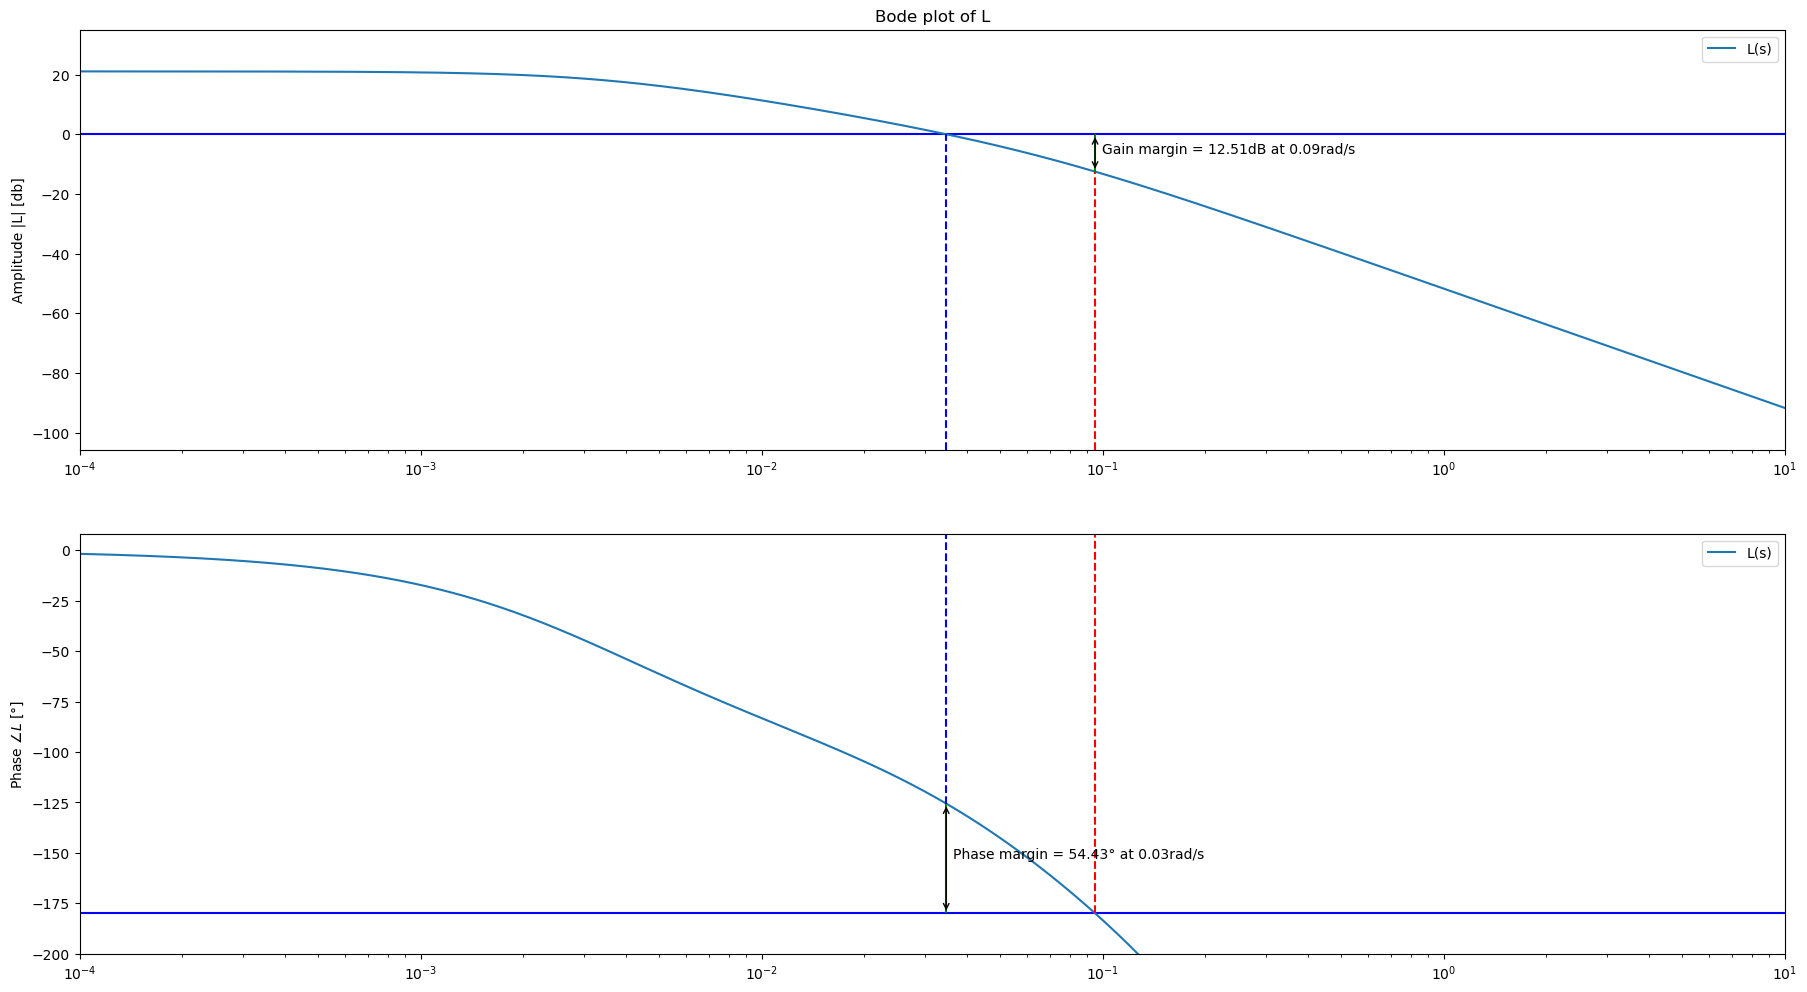

In [110]:
# IMC tuning values
C = Controller({})
C.parameters['Kc'] = 10.616890921363435
C.parameters['Ti'] = 90.19
C.parameters['Td'] = 15.215631444727798
C.parameters['alpha'] = 0.1

# python FOPDT values
P = Process({})
P.parameters['Kp']  = 0.6890796420174794
P.parameters['Tlag1'] = 195.93418960703713
P.parameters['theta'] = 6.661942351380765

omega = np.logspace(-4, 1, 10000)

StabilityMargins(P, C, omega)